In [1]:

import pandas as pd
import numpy as np
import json

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
sns.set(rc={'figure.figsize':(30,20)})

In [3]:
df = pd.read_csv('../data/df_tm_50_sentiment_hsd_entities_rel.csv', index_col='id') 

/home/yiyi/miniconda3/envs/migr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df = df[df['relevant']==True]

In [5]:
df.head()

,author_id,conversation_id,text,id.1,created_at,lang,long,lat,hashtags,user_mentions,...,entity_26,entity_27,entity_28,entity_29,prim_topic,top_topics,top3,relevant,Year,hatespeech_label
id,,,,,,,,,,,,,,,,,,,,,
840100706048602112,1.951021e+07,840100706048602112,"""#Europe plays a pivotal role in the developme...",8.401007e+17,2017-03-10T07:23:11.000Z,en,7.006937,50.960705,"['Europe', 'DigitalEconomy']",['FedEx'],...,NaN,NaN,NaN,NaN,29,"[29, 0, 33, 35, 12, 46, 4, 9, 21, 39]","[29, 0, 33]",True,2017,normal
1107975052677578752,5.324331e+08,1107975052677578752,"You are us, the migrant doctors, midwives,tea...",1.107975e+18,2019-03-19T12:00:12.000Z,en,NaN,NaN,NaN,"['bbclaurak', 'KenLoachSixteen', 'LeftUnityUK']",...,NaN,NaN,NaN,NaN,36,"[36, 5, 10, 33, 35, 47, 41, 20, 43, 2]","[36, 5, 10]",True,2019,normal
469489878972268545,1.316819e+09,469489878972268545,Think my #asylum12 convention hi is finally wa...,4.694899e+17,2014-05-22T14:48:04.000Z,en,-2.898172,53.198954,['asylum12'],NaN,...,NaN,NaN,NaN,NaN,20,"[20, 3, 23, 35, 44, 29, 8, 25, 41, 18]","[20, 3, 23]",True,2014,normal
1249022951170674690,1.004854e+09,1249022951170674690,En mode confinement / Lockdown style #confinem...,1.249023e+18,2020-04-11T17:14:11.000Z,en,2.859230,50.420720,"['confinement', 'lockdown', 'sun', 'printemps'...",NaN,...,NaN,NaN,NaN,NaN,45,"[45, 29, 15, 46, 17, 22, 9, 44, 13, 8]","[45, 29, 15]",True,2020,normal
670555404208881664,1.513822e+09,670555404208881664,@GeorgeAylett more #war more consequences more...,6.705554e+17,2015-11-28T10:50:41.000Z,en,0.546883,51.378130,"['war', 'refugees', 'refugeeswelcome', 'sanctu...",['GeorgeAylett'],...,NaN,NaN,NaN,NaN,34,"[34, 20, 17, 39, 0, 25, 29, 1, 8, 13]","[34, 20, 17]",True,2015,normal


In [6]:
country_list = ['UK', 'ES', 'PL', 'FR', 'SE', 'NL', 'DE', 'AT', 'IT', 'CH', 'HU']


In [7]:
matplotlib.rc_file_defaults()


In [8]:
from collections import defaultdict


In [9]:
country_dict={
    'AT':'Austria', 'CH':'Switzerland', 'DE':'Germany', 'ES':'Spain', 'FR':'France', 
    'HU':'Hungary', 'IT':'Italy', 'NL':'Netherlands', 'PL':'Poland', 'SE':'Sweden', 
    'GB':'United Kingdom', 'ALL':'11 Destination Countries on Average'
}

In [10]:

def plot_senti_hate_youth(df, country_code):
    
    years =[2013,2014,2015,2016,2017,2018,2019,2020]
    
    if country_code=='UK':
        country_code='GB'
    
    if country_code!='ALL':
        df_country = df[df['country_code']==country_code]
    else: 
        df_country = df
    
    
    # create df yuner
    yuner_country = pd.read_csv('../data/eurostats/youth_unemployment_rate.csv', index_col=0)
    yuner_country['ALL'] = yuner_country.mean(axis=1)
    yuner_country = yuner_country[country_code]
    df_yuner = pd.DataFrame()
    df_yuner['Youth Unemployment Rate (%)']= yuner_country.tolist()
    df_yuner['Year']= yuner_country.index
    df_yuner.index = df_yuner['Year']
    
    
    df_uner = pd.read_csv('../data/eurostats/unemployment_rate.csv', index_col=0)
    df_uner['ALL'] = df_uner.mean(axis=1)

    df_uner = df_uner[country_code]
    df_yuner['Total Unemployment rate (%)'] = df_uner.tolist()
    
    # real gdp growth rate
    df_gdp_rate = pd.read_csv('../data/eurostats/real_gdp_growth_rate.csv', index_col=0)
    df_gdp_rate['ALL'] = df_gdp_rate.mean(axis=1)
    df_gdp_rate = df_gdp_rate[country_code]
    df_yuner['Real GDP Growth Rate (%)'] = df_gdp_rate.tolist()
        
    
    neg_senti_df= df_country[df_country['sentiment']=='negative']
    neg_senti_dict= {year:0 for year in years}
    for name, group in neg_senti_df.groupby('Year'):
        neg_senti_dict[name]= len(group)/len(df_country[df_country['Year']==name])
        
    print(neg_senti_dict)
    df_yuner['Negative Tweets (%)']= list(neg_senti_dict.values())

    print(df_yuner.head())
    
    hatespeech_df= df_country[df_country['hatespeech_label']=='hatespeech']
    hatespeech_dict={year:0 for year in years}
    for name, group in hatespeech_df.groupby('Year'):
        hatespeech_dict[name]=len(group)/len(df_country[df_country['Year']==name])

    print(hatespeech_dict)
    df_yuner['Hatespeech Tweets (%)']= list(hatespeech_dict.values())
    
    print(df_yuner.head())
    matplotlib.rc_file_defaults()
#     ax1 = sns.set_style(style=None, rc=None)
#     df_yuner.drop(columns=['Year'], inplace=True)
    # sns.lineplot(x='Year', data= df_yuner)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))
    ax1.plot('Year','Real GDP Growth Rate (%)', data=df_yuner, marker='o')
    ax1.plot('Year','Total Unemployment rate (%)', data=df_yuner, marker='o' )
    
    ax1.plot('Year','Youth Unemployment Rate (%)', data=df_yuner, marker='o')
    ax2.plot('Year','Negative Tweets (%)', data=df_yuner,color='red',  marker='v')
    ax2.plot('Year','Hatespeech Tweets (%)', data=df_yuner,color='purple', marker='v')
    ax1.legend()
    ax2.legend()
    
#     fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize=(12,12))
      

    # ax2 = ax1.twinx()
#     lines_df = pd.DataFrame({
#         'Year', df_yuner
#     })
#     sns.lineplot( data = df_yuner['Real GDP Growth Rate (%)'], marker='o', ax=ax1)
#     sns.lineplot( data = df_yuner['Total Unemployment rate (%)'], marker='o', ax=ax2)

#     sns.lineplot( data = df_yuner['Youth Unemployment Rate (%)'], marker='o', ax=ax3)
#     sns.lineplot(data=df_yuner['Negative Tweets (%)'], marker='o', ax=ax4 )
#     sns.lineplot(data=df_yuner['Hatespeech Tweets (%)'], marker='o', ax=ax5 )

#     ax1.set(xlabel='')
#     ax2.set(xlabel='')
#     ax3.set(xlabel='')
#     ax4.set(xlabel='')
    ax1.set(xlabel=' ')


    
    ax1.set_title(country_dict[country_code])
    fig.savefig('../images/correlations/'+country_code+'.png')

In [12]:
df= df[df['Year'].isin([2013,2014,2015,2016,2017,2018,2019,2020])]

{2013: 0.2204359475704251, 2014: 0.24587888252646192, 2015: 0.21904709867774014, 2016: 0.1582962492053401, 2017: 0.12104857363145721, 2018: 0.07086614173228346, 2019: 0.26970357656445704, 2020: 0.2953468713754939}
      Youth Unemployment Rate (%)  Year  Total Unemployment rate (%)  \
Year                                                                   
2013                         20.7  2013                          7.5   
2014                         17.0  2014                          6.1   
2015                         14.6  2015                          5.3   
2016                         13.0  2016                          4.8   
2017                         12.1  2017                          4.3   

      Real GDP Growth Rate (%)  Negative Tweets (%)  
Year                                                 
2013                       2.2             0.220436  
2014                       2.9             0.245879  
2015                       2.4             0.219047  
2016       

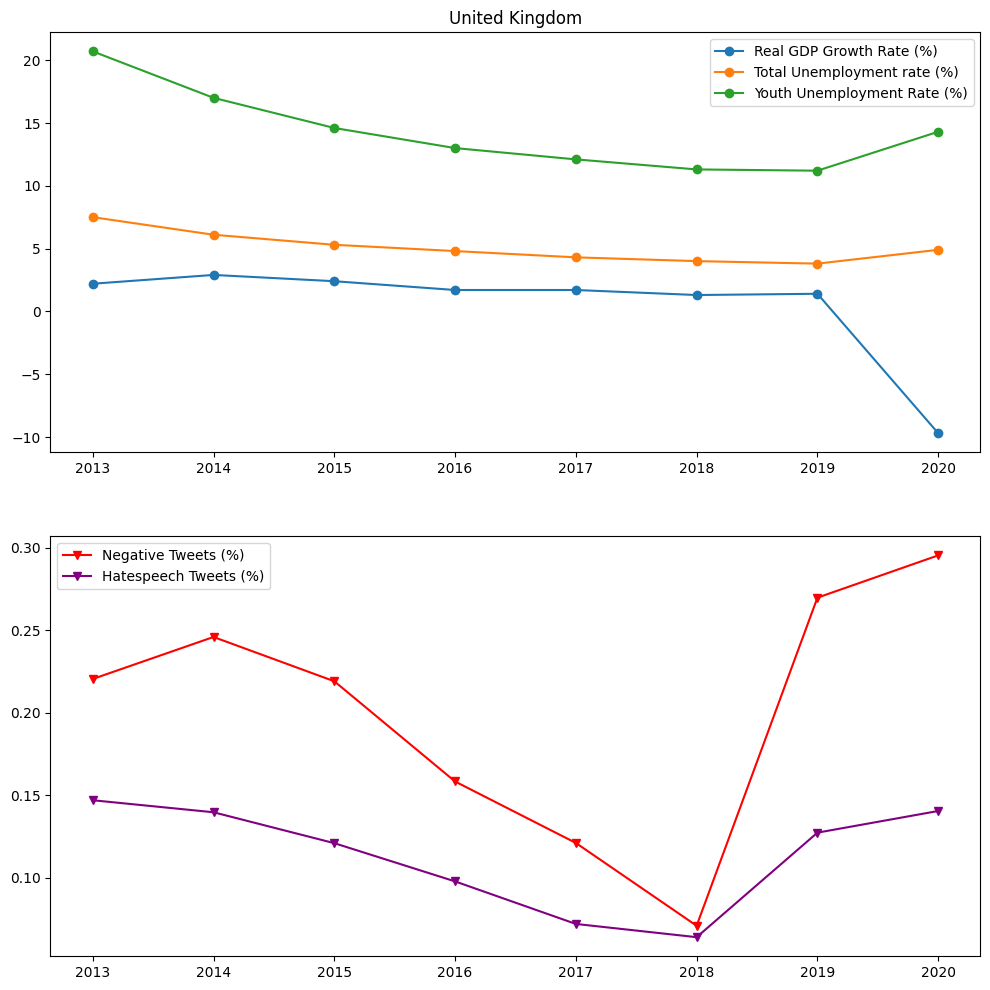

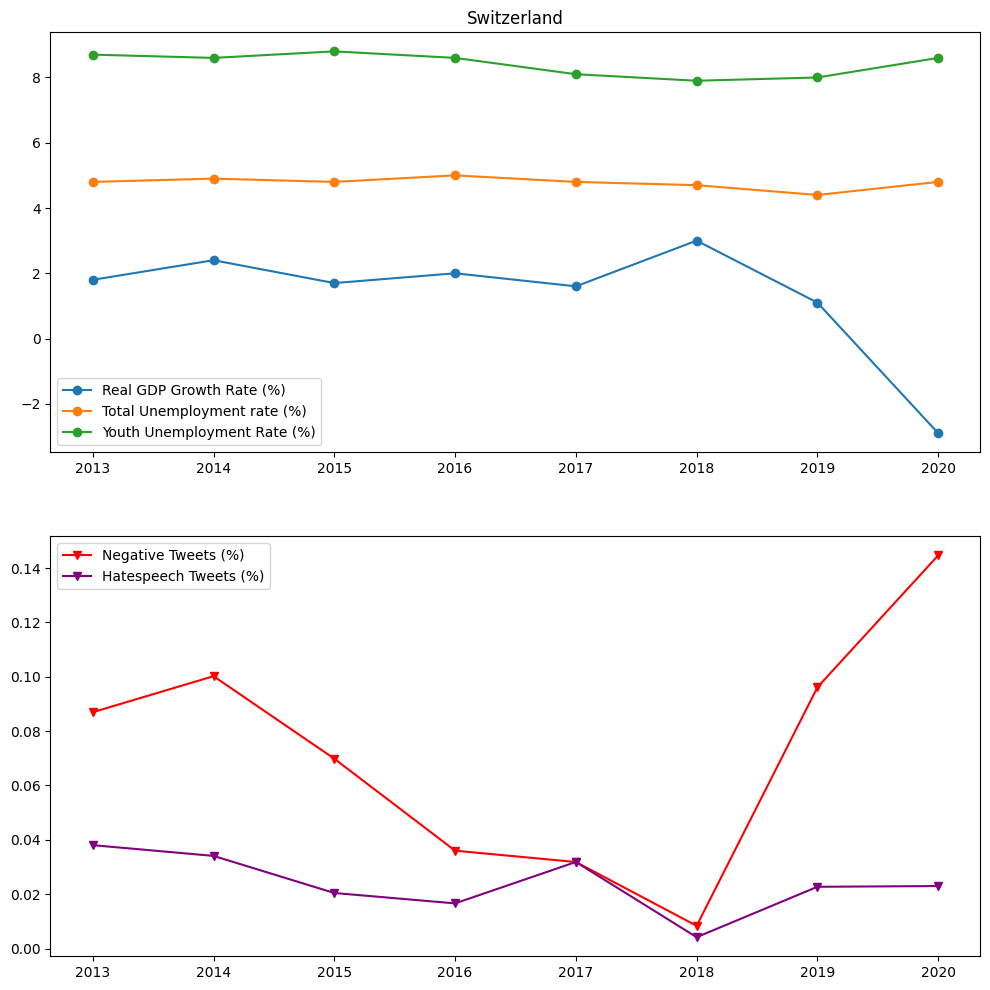

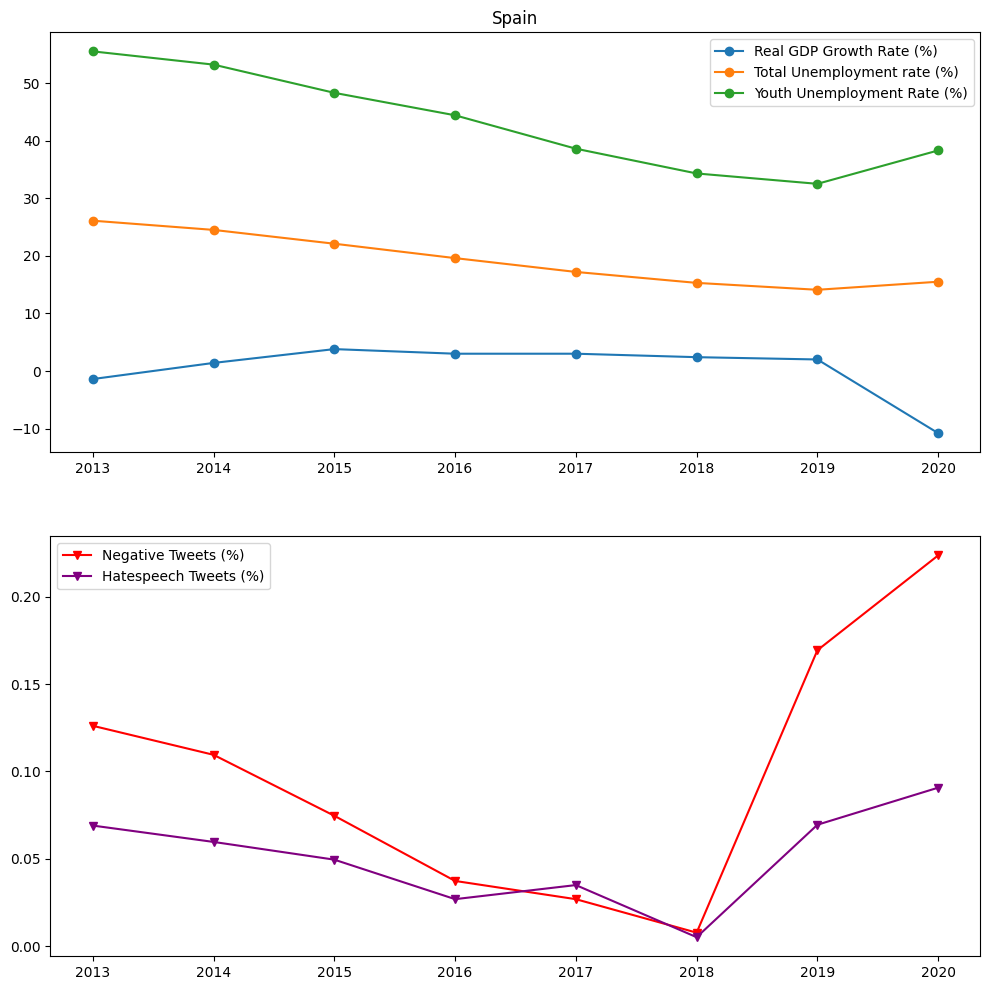

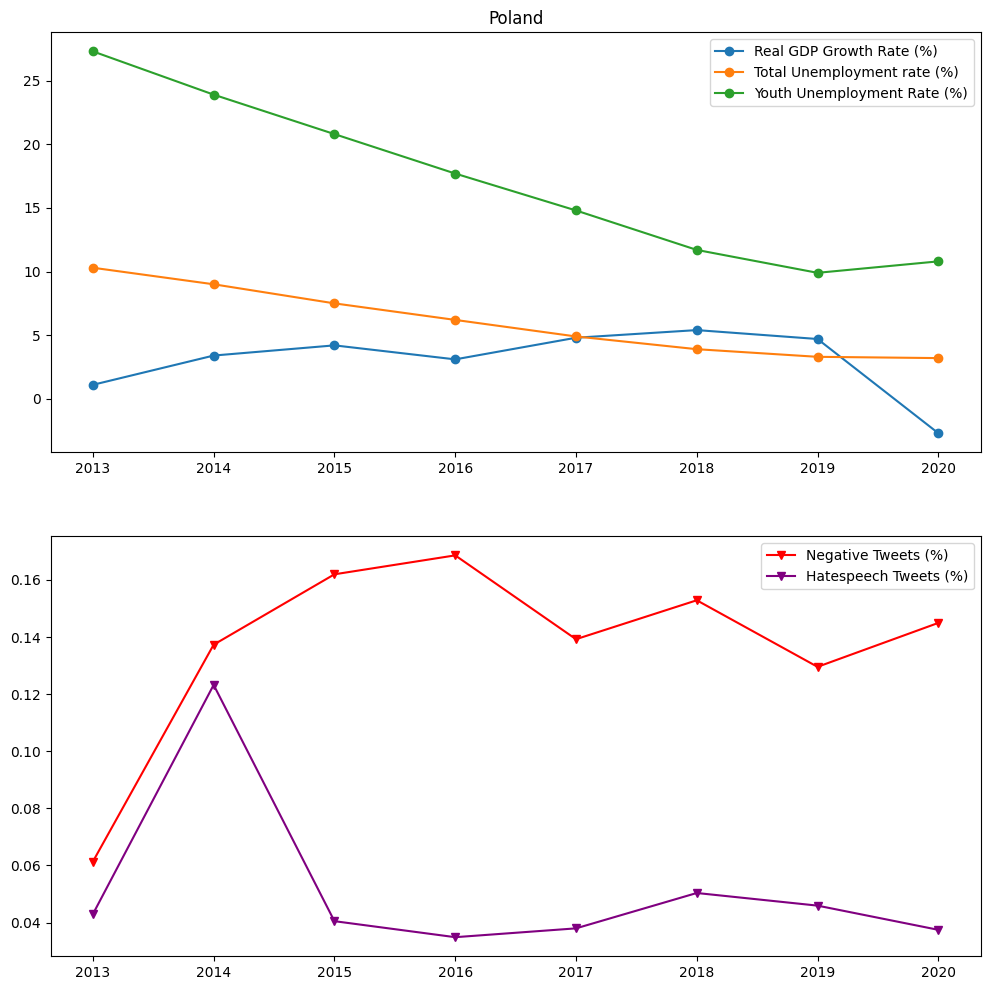

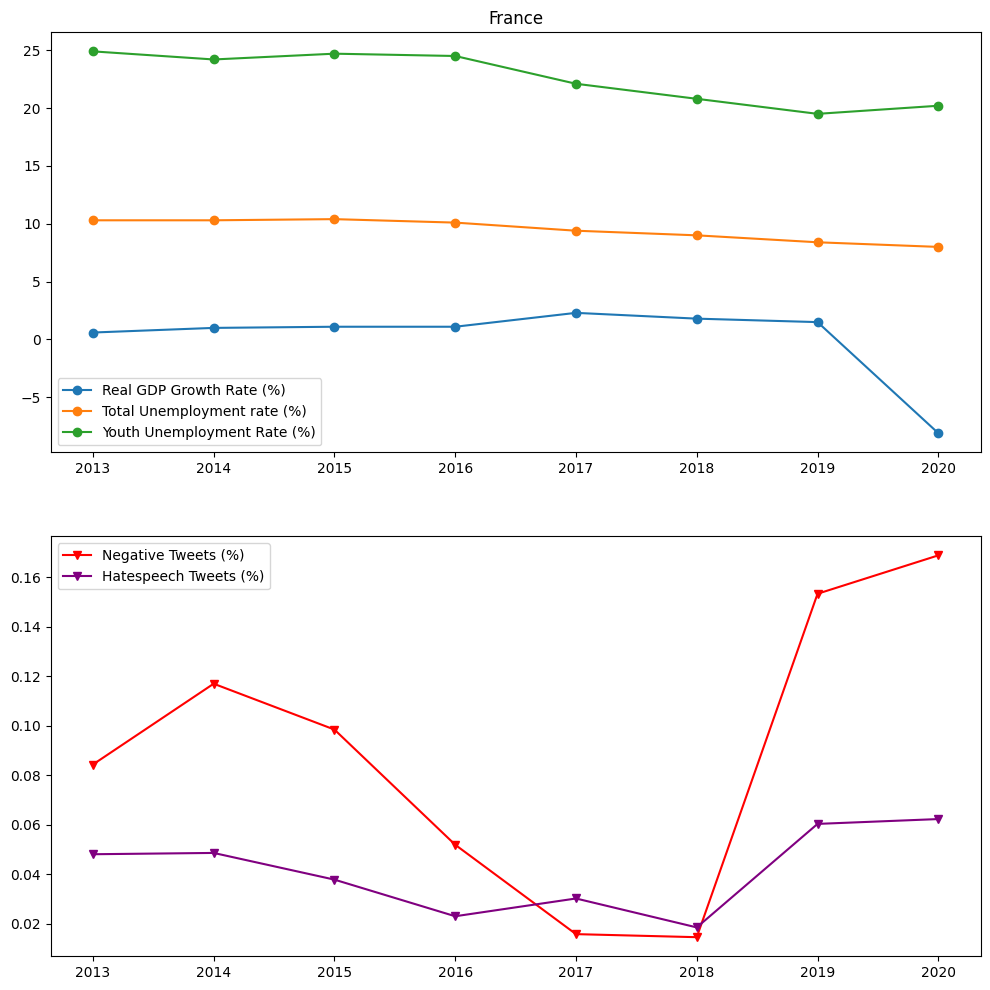

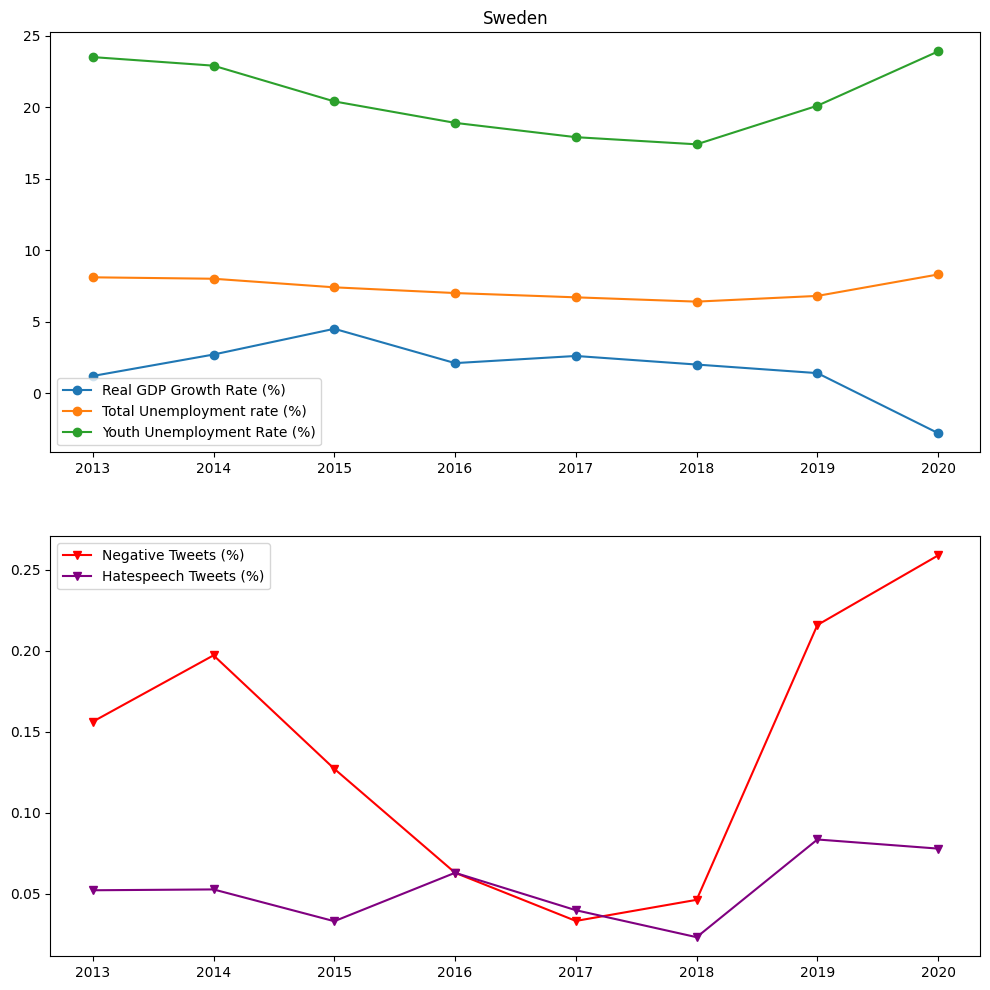

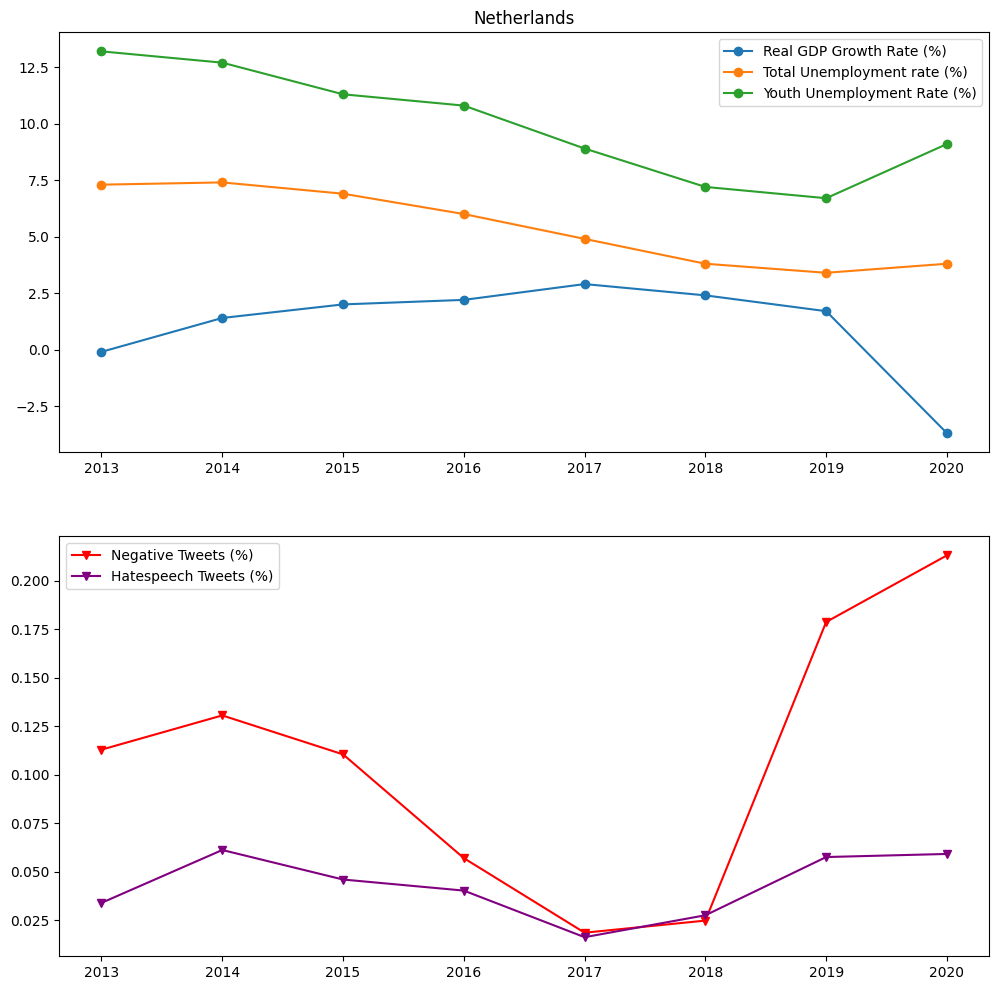

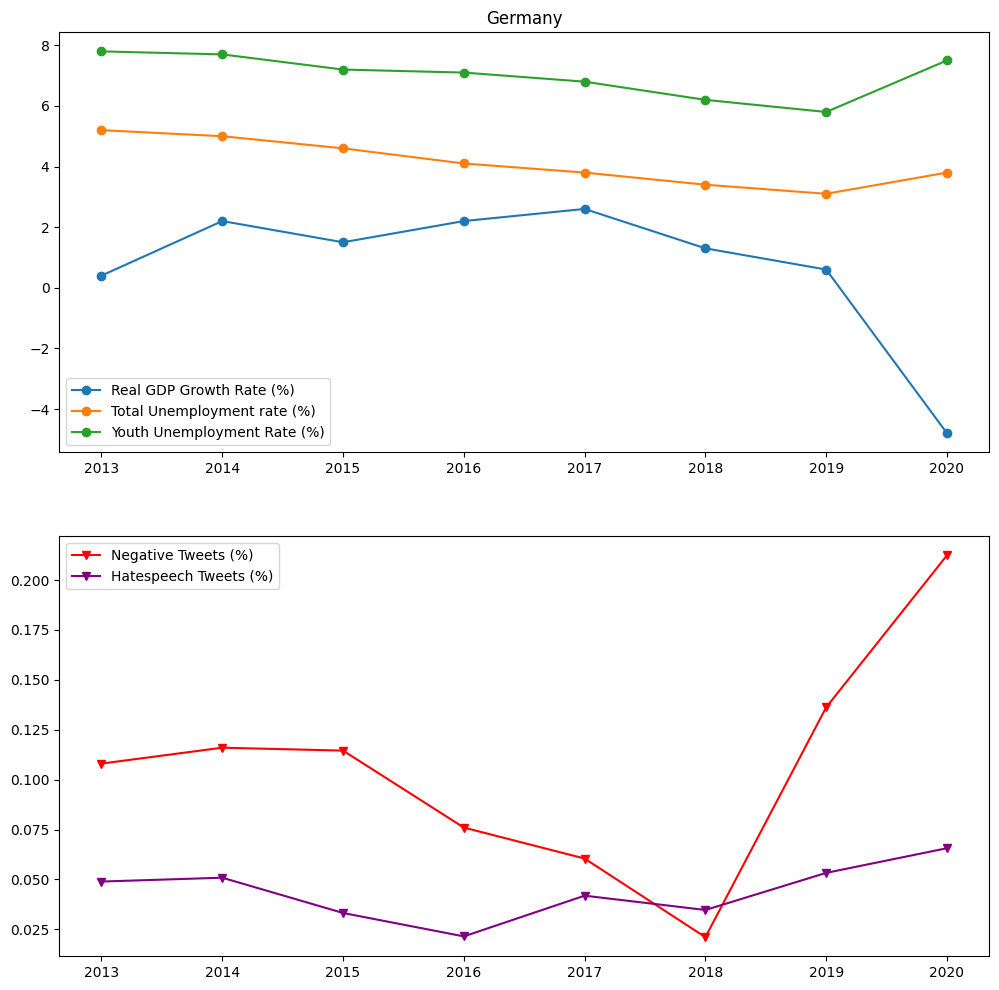

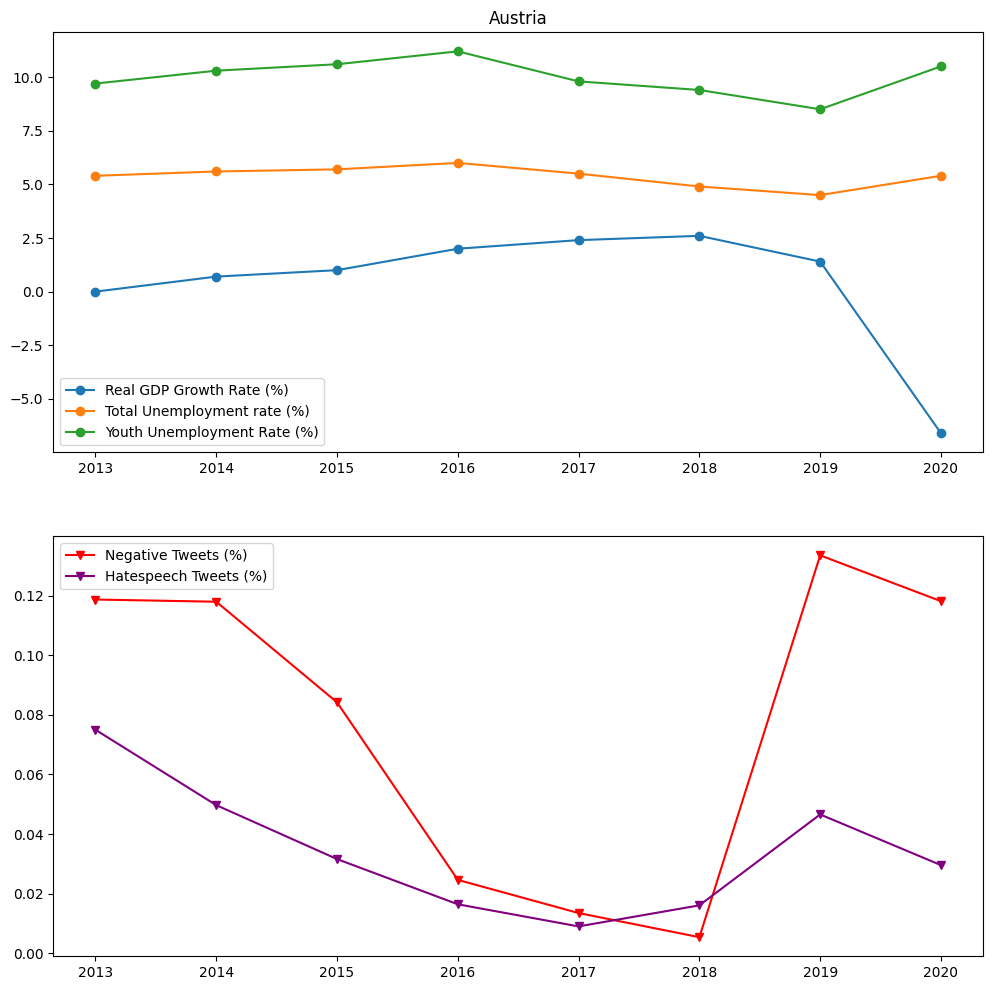

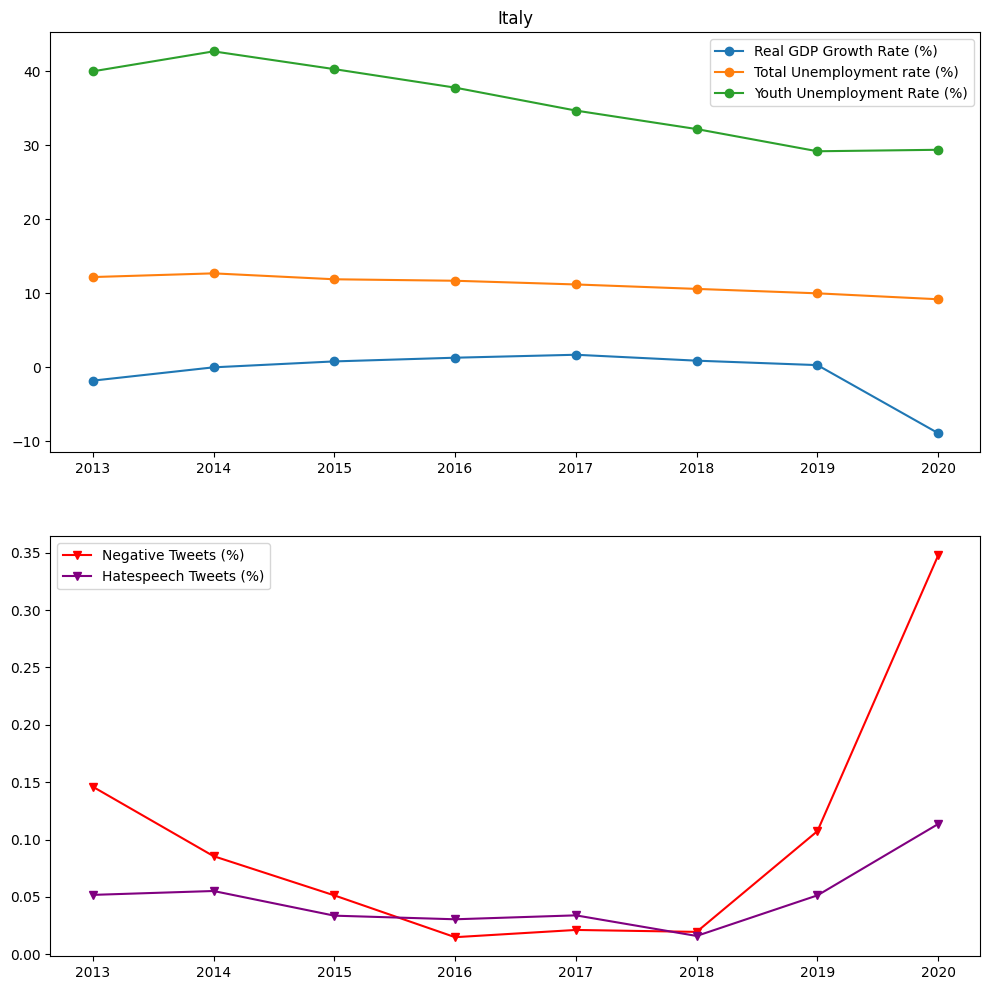

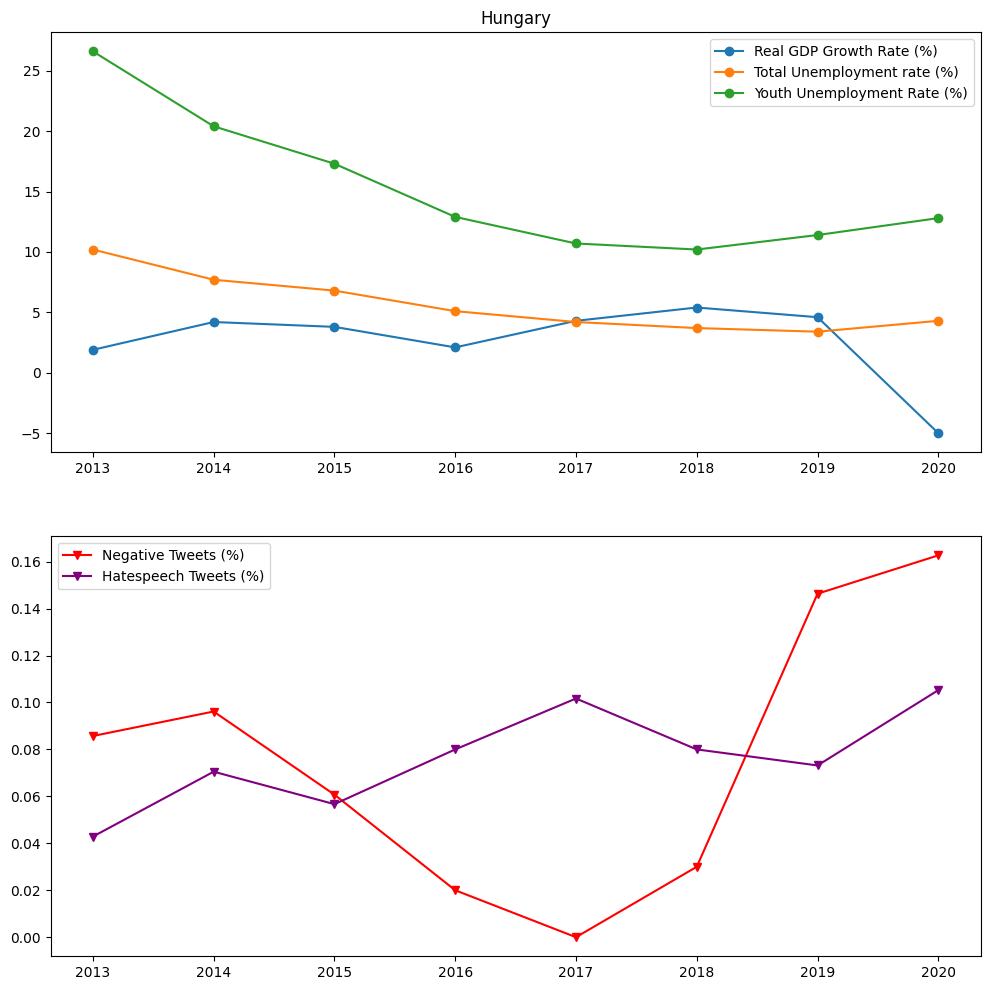

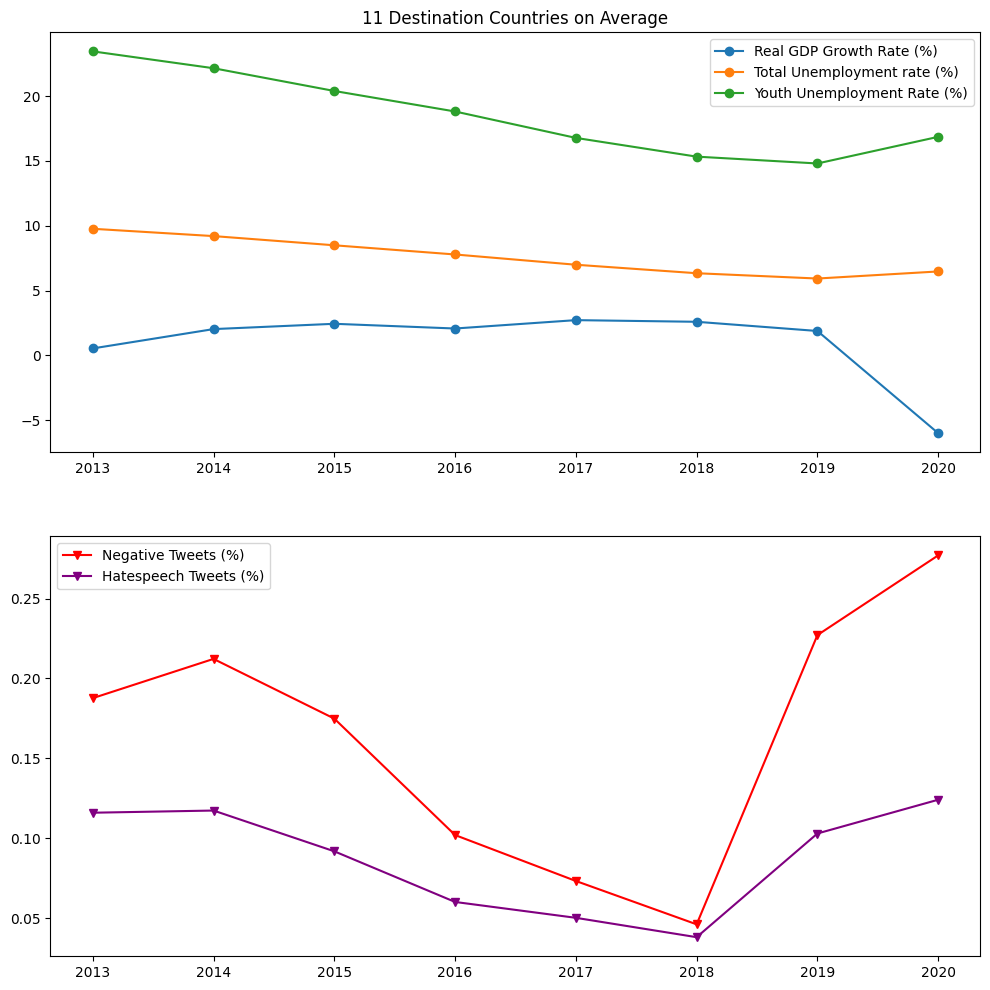

In [13]:
country_list = [ 'UK', 'CH', 'ES', 'PL', 'FR', 'SE', 'NL', 'DE', 'AT', 'IT',  'HU', 'ALL']
for country in country_list:
    plot_senti_hate_youth(df, country)